In [3]:
%pip install scikit-learn
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install python-time

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

O dataset escolhido foi o 'Credit Card Fraud Detection' que armazena dados sobre uso de cartão de crédito e define se aquele uso é uma fraude ou não.

In [5]:
df = pd.read_csv("creditcardpt1.csv")
df = pd.concat([df, pd.read_csv("creditcardpt2.csv")])
df = df.reset_index(drop=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,84693.0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,...,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,19.00,0
1,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
2,84695.0,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,...,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,66.60,0
3,84695.0,0.969231,-0.233554,0.238473,0.145793,-0.545741,-0.970680,0.347393,-0.209522,-0.342571,...,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234,141.00,0
4,84696.0,-0.856523,1.080875,1.866956,1.729941,-0.161741,0.028789,0.401787,0.043774,-0.213916,...,0.007365,0.077392,-0.221906,0.394141,0.237225,-0.080102,-0.291408,0.092140,2.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,84690.0,0.984968,0.128543,0.184937,1.111150,-0.219888,-0.848688,0.516601,-0.198159,-0.553829,...,-0.253419,-1.015941,0.056629,0.487439,0.322926,-0.784093,-0.017026,0.035475,111.91,0
284803,84690.0,-2.220505,1.004012,1.817520,0.468496,-1.543388,0.783308,-1.443050,1.759537,0.113066,...,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901,8.99,0
284804,84691.0,-2.280315,2.241435,-0.082290,-0.417547,-0.700328,-0.393024,-0.347291,1.247646,-0.136156,...,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114,9.99,0
284805,84691.0,-0.879062,0.476433,2.418721,-1.032235,-0.008689,-1.090413,0.919090,-0.466605,0.554397,...,-0.067034,-0.057123,0.021552,0.671743,-0.419799,-0.230648,-0.534309,-0.311789,5.99,0


In [6]:
# Verificando algumas informacoes sobre os dados de cada coluna da tabela, para entede-los 
# e assim possibilitar o correto pre-processamento

vis = pd.DataFrame(df.dtypes, columns=['dtype'])
vis['missing values qtt'] = df.isnull().sum().values
vis['unique values qtt'] = df.nunique().values

desc = pd.DataFrame(df.describe(include='all').transpose())
vis['min value'] = desc['min'].values
vis['max value'] = desc['max'].values

vis

,dtype,missing values qtt,unique values qtt,min value,max value
Time,float64,0,124592,0.000000,172792.000000
V1,float64,0,275663,-56.407510,2.454930
V2,float64,0,275663,-72.715728,22.057729
V3,float64,0,275663,-48.325589,9.382558
V4,float64,0,275663,-5.683171,16.875344
V5,float64,0,275663,-113.743307,34.801666
V6,float64,0,275663,-26.160506,73.301626
V7,float64,0,275663,-43.557242,120.589494
V8,float64,0,275663,-73.216718,20.007208
V9,float64,0,275663,-13.434066,15.594995


Na tabela acima podemos percber que não há dados faltando no dataframe escolhido e que nem todas as colunas vão ser usadas para a predição das classes.
Uma outra infoormação importante para o pre-processamento é que todos os dados já são numéricos, então não será necessária passar pela etapa de transformar dados categóricos em números.

Podemos ver que a coluna 'Class' tem apenas dois valores possíveis, então podemos afirmar que ela é o nosso target.

Uma coluna que tem um comportamento semelhante a um index é o 'Time', então vamos excluí-la, pois aparentemente ela não tem qualquer valor aparente. Provavelmente é apenas o tempo em que cada dado foi coletado.

Para trabalhar com o dataset da melhor maneira e usar uma métrica adequada para verificar se os modelos estão se saindo bem, é necessário entender um pouco os dados. Então vamos fazer algumas visualizações nos dados:

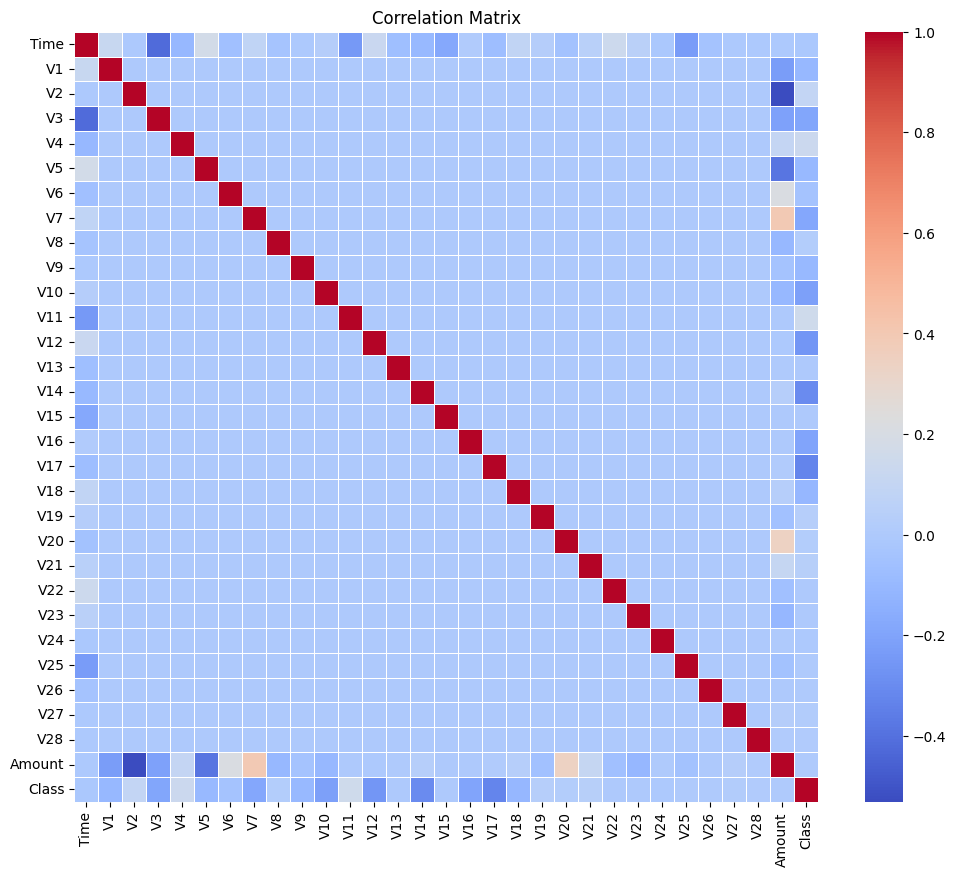

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

Podemos observar que os dados, no geral, tem uma correlação muito baixa

In [8]:
target = df['Class']

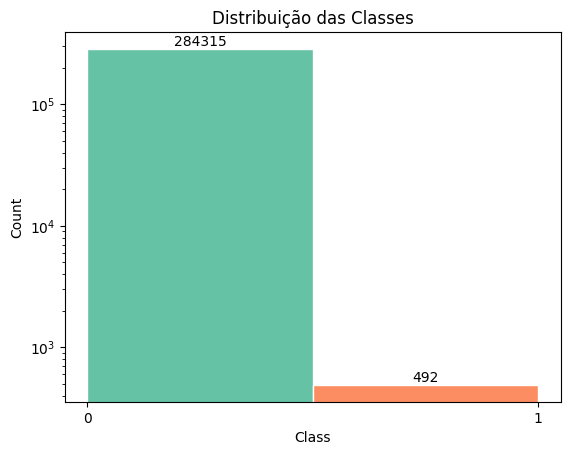

In [76]:
colors = sns.color_palette('Set2')

ax = sns.histplot(data=target, binwidth=0.5, edgecolor='white')

for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks([0, 1])

plt.yscale('log')
plt.title('Distribuição das Classes')
plt.show()

# vamos usar o gráfico em log para conseguir visualizar melhor, pois há uma diferença muito grande entre as quantidades

In [10]:
print(f"Class 1: {np.count_nonzero(target)/target.shape[0] * 100:,.2f}%")
print(f"Class 0: {(target.shape[0] - np.count_nonzero(target))/target.shape[0] *100:,.2f}%")

Class 1: 0.17%
Class 0: 99.83%


Há uma diferença absurda entre as classes, então usar a acurácia não vai ser uma boa estratégia. Visto que se um modelo apenas chutar tudo 0 a sua acurácia vai ser igual a porcentagem de dados que tem classe 1, ou seja, 99.83% o que não faz sentido, pois o modelo apenas está chutando.

A métrica mais adequada para o caso em que as classes tem quantidades de dados muito discrepantes é a curva ROC, pois ela leva em consideração isso. Então se um modelo chuta tudo 0, usando a curva ROC vamos ter um resultado de 0.5 da curva ROC. Curva ROC de 0.5 significa que o modelo está chutando, ou seja, essa métrica consegue detectar isso.

In [11]:
# A coluna 'Time' não vai ser usada e a coluna 'Class' é o target, ou seja, o que queremos prever(se é fraude ou não)

df_pre_proc = df.drop(['Time', 'Class'] , axis=1)

df_pre_proc

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,0.352698,...,0.211867,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,19.00
1,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,...,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31
2,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,-0.120472,...,0.069161,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,66.60
3,0.969231,-0.233554,0.238473,0.145793,-0.545741,-0.970680,0.347393,-0.209522,-0.342571,-0.100331,...,0.240978,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234,141.00
4,-0.856523,1.080875,1.866956,1.729941,-0.161741,0.028789,0.401787,0.043774,-0.213916,0.155907,...,-0.068915,0.007365,0.077392,-0.221906,0.394141,0.237225,-0.080102,-0.291408,0.092140,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.984968,0.128543,0.184937,1.111150,-0.219888,-0.848688,0.516601,-0.198159,-0.553829,0.096242,...,0.103577,-0.253419,-1.015941,0.056629,0.487439,0.322926,-0.784093,-0.017026,0.035475,111.91
284803,-2.220505,1.004012,1.817520,0.468496,-1.543388,0.783308,-1.443050,1.759537,0.113066,-1.297413,...,-0.407173,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901,8.99
284804,-2.280315,2.241435,-0.082290,-0.417547,-0.700328,-0.393024,-0.347291,1.247646,-0.136156,0.643005,...,0.348312,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114,9.99
284805,-0.879062,0.476433,2.418721,-1.032235,-0.008689,-1.090413,0.919090,-0.466605,0.554397,-0.356330,...,-0.267422,-0.067034,-0.057123,0.021552,0.671743,-0.419799,-0.230648,-0.534309,-0.311789,5.99


In [12]:
# Foi escolhido dividir os dados em 50% para treino dos modelos e 50% para realizar os testes

# f(X) -> y
X_train, X_test = train_test_split(df_pre_proc, test_size=0.5, shuffle=False)
y_train, y_test = train_test_split(target, test_size=0.5, shuffle=False)

In [13]:
# criando uma tabela  para armazenar os dados de cada algoritmo

models_info = pd.DataFrame(columns=['fit_time', 'pred_time', 'ROC_curve', 'qtt_models', 'best_params'], index=['KNN', 'Naive_Bayes', 'Random_Forest', 'MLP', 'Decision_Tree'])

### KNN
Para o knn vamos variar a quantidade de vizinhos que ele vai considerar

In [14]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 12, 15, 17]
}

In [15]:
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=10, n_jobs=-1) # cross validation de 10 folds

In [16]:
start_time = time.time()
knn_grid.fit(X_train, y_train)
end_time = time.time()

models_info['fit_time']['KNN'] = end_time - start_time

In [17]:
models_info['qtt_models']['KNN'] = len(knn_grid.cv_results_['params']*10)

In [18]:
models_info['best_params']['KNN'] = knn_grid.best_params_

In [19]:
start_time = time.time()
y_pred_knn = knn_grid.predict(X_test)
end_time = time.time()

models_info['pred_time']['KNN'] = end_time - start_time

In [20]:
models_info['ROC_curve']['KNN'] = roc_auc_score(y_test, y_pred_knn)

In [21]:
models_info

,fit_time,pred_time,ROC_curve,qtt_models,best_params
KNN,192.68315,30.305486,0.80654,70,{'n_neighbors': 3}
Naive_Bayes,NaN,NaN,NaN,NaN,NaN
Random_Forest,NaN,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN,NaN
Decision_Tree,NaN,NaN,NaN,NaN,NaN


### Random Forest
Vamos variar dois parâmetros: \
n_estimators: numeros de arvores da floresta \
max_depth: profundidade maxima das arvores

In [22]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [2, 3, 4, 5]
}

In [23]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

In [24]:
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='roc_auc', cv=10, n_jobs=-1)

start_time = time.time()
rf_grid.fit(X_train, y_train)
end_time = time.time()

models_info['fit_time']['Random_Forest'] = end_time - start_time

In [25]:
models_info['qtt_models']['Random_Forest'] = len(rf_grid.cv_results_['params']*10)

In [26]:
models_info['best_params']['Random_Forest'] = rf_grid.best_params_

In [27]:
start_time = time.time()
y_pred_rf = rf_grid.predict(X_test)
end_time = time.time()

models_info['pred_time']['Random_Forest'] = end_time - start_time

models_info

,fit_time,pred_time,ROC_curve,qtt_models,best_params
KNN,192.68315,30.305486,0.80654,70,{'n_neighbors': 3}
Naive_Bayes,NaN,NaN,NaN,NaN,NaN
Random_Forest,912.766293,0.628171,NaN,120,"{'max_depth': 5, 'n_estimators': 200}"
MLP,NaN,NaN,NaN,NaN,NaN
Decision_Tree,NaN,NaN,NaN,NaN,NaN


In [28]:
models_info['ROC_curve']['Random_Forest'] = roc_auc_score(y_test, y_pred_rf)

In [29]:
models_info

,fit_time,pred_time,ROC_curve,qtt_models,best_params
KNN,192.68315,30.305486,0.80654,70,{'n_neighbors': 3}
Naive_Bayes,NaN,NaN,NaN,NaN,NaN
Random_Forest,912.766293,0.628171,0.916114,120,"{'max_depth': 5, 'n_estimators': 200}"
MLP,NaN,NaN,NaN,NaN,NaN
Decision_Tree,NaN,NaN,NaN,NaN,NaN


### Naive Bayes

In [30]:
param_grid_nb = {
    
}

In [31]:
nb = GaussianNB()

In [32]:
nb_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, scoring='roc_auc', cv=10, n_jobs=-1)
start_time = time.time()
nb_grid.fit(X_train, y_train)
end_time = time.time()

models_info['fit_time']['Naive_Bayes'] = end_time - start_time

In [33]:
models_info['qtt_models']['Naive_Bayes'] = len(nb_grid.cv_results_['params']*10)

In [34]:
models_info['best_params']['Naive_Bayes'] = nb_grid.best_params_

In [35]:
start_time = time.time()
y_pred_nb = nb_grid.predict(X_test)
end_time = time.time()

models_info['pred_time']['Naive_Bayes'] = end_time - start_time

In [36]:
models_info['ROC_curve']['Naive_Bayes'] = roc_auc_score(y_test, y_pred_nb)

In [37]:
models_info

,fit_time,pred_time,ROC_curve,qtt_models,best_params
KNN,192.68315,30.305486,0.80654,70,{'n_neighbors': 3}
Naive_Bayes,0.921734,0.103357,0.9019,10,{}
Random_Forest,912.766293,0.628171,0.916114,120,"{'max_depth': 5, 'n_estimators': 200}"
MLP,NaN,NaN,NaN,NaN,NaN
Decision_Tree,NaN,NaN,NaN,NaN,NaN


### Multilayer Perceptron
Vamos variar o max_iter(maximo de iterações)

In [38]:
param_grid_mlp = {
    'max_iter': [50, 100, 150, 200, 300, 400, 500]
}

In [39]:
mlp = MLPClassifier(random_state=1)

In [40]:
mlp_grid = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, scoring='roc_auc', cv=10, n_jobs=-1)

start_time = time.time()
mlp_grid.fit(X_train, y_train)
end_time = time.time()

models_info['fit_time']['MLP'] = end_time - start_time

In [41]:
models_info['qtt_models']['MLP'] = len(mlp_grid.cv_results_['params']*10)

In [42]:
models_info['best_params']['MLP'] = mlp_grid.best_params_

In [43]:
start_time = time.time()
y_pred_mlp = mlp_grid.predict(X_test)
end_time = time.time()

models_info['pred_time']['MLP'] = end_time - start_time

In [44]:
models_info['ROC_curve']['MLP'] = roc_auc_score(y_test, y_pred_mlp)

In [45]:
models_info

,fit_time,pred_time,ROC_curve,qtt_models,best_params
KNN,192.68315,30.305486,0.80654,70,{'n_neighbors': 3}
Naive_Bayes,0.921734,0.103357,0.9019,10,{}
Random_Forest,912.766293,0.628171,0.916114,120,"{'max_depth': 5, 'n_estimators': 200}"
MLP,243.093124,0.165475,0.856726,70,{'max_iter': 50}
Decision_Tree,NaN,NaN,NaN,NaN,NaN


### Decision Tree

Vamos variar três parâmetros: \
max_depth: profundidade maxima da arvore \
criterion: função de avaliação da qualidade da divisão em cada nó da árvore \
max_features: número máximo de características a serem consideradas em cada divisão de nó

In [46]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [47]:
dt = DecisionTreeClassifier(random_state = 42)

In [48]:
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring='roc_auc', cv=10, n_jobs=-1)

start_time = time.time()
dt_grid.fit(X_train, y_train)
end_time = time.time()

models_info['fit_time']['Decision_Tree'] = end_time - start_time

In [49]:
models_info['qtt_models']['Decision_Tree'] = len(dt_grid.cv_results_['params']*10)

In [50]:
models_info['best_params']['Decision_Tree'] = dt_grid.best_params_

In [51]:
start_time = time.time()
y_pred_dt = dt_grid.predict(X_test)
end_time = time.time()

models_info['pred_time']['Decision_Tree'] = end_time - start_time

In [52]:
models_info['ROC_curve']['Decision_Tree'] = roc_auc_score(y_test, y_pred_dt)

#### Resultados

In [57]:
pd.set_option('display.max_colwidth', 100)

models_info

,fit_time,pred_time,ROC_curve,qtt_models,best_params
KNN,192.68315,30.305486,0.80654,70,{'n_neighbors': 3}
Naive_Bayes,0.921734,0.103357,0.9019,10,{}
Random_Forest,912.766293,0.628171,0.916114,120,"{'max_depth': 5, 'n_estimators': 200}"
MLP,243.093124,0.165475,0.856726,70,{'max_iter': 50}
Decision_Tree,32.22937,0.019212,0.880401,240,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}"


## Visualizando os resultados

### Curva ROC

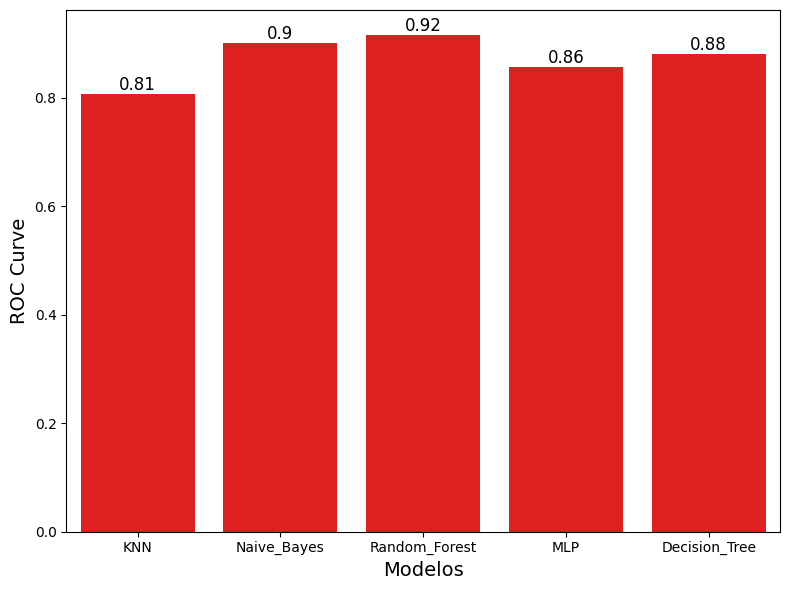

In [70]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=models_info.index, y=models_info['ROC_curve'], color='red')

for index, value in enumerate(models_info['ROC_curve']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Modelos', fontsize=14)
ax.set_ylabel('ROC Curve', fontsize=14)

plt.tight_layout()
plt.show()

### Tempo para treinamento

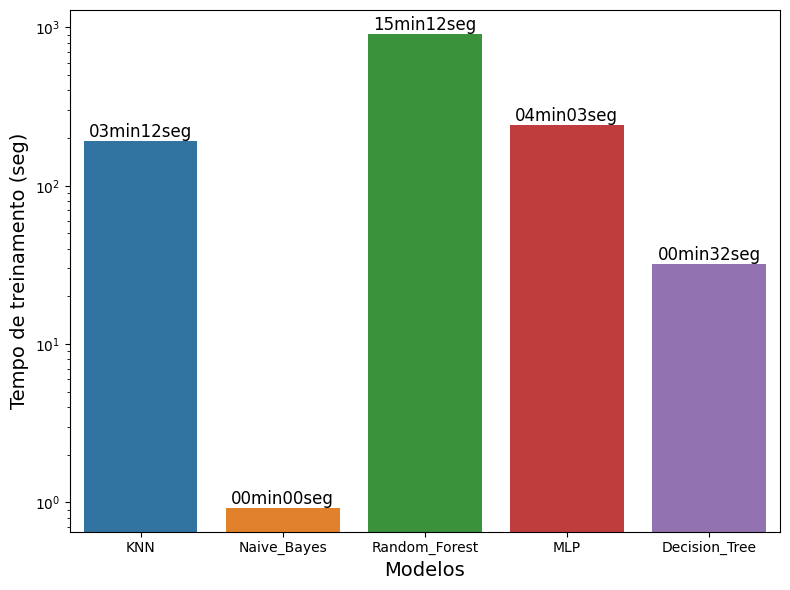

In [109]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=models_info.index, y=models_info['fit_time'])

for index, value in enumerate(models_info['fit_time']):
    minutes = value // 60
    seconds = value % 60
    time_formatted = "{:02d}min{:02d}seg".format(int(minutes), int(seconds))
    plt.text(index, value, time_formatted, ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Modelos', fontsize=14)
ax.set_ylabel('Tempo de treinamento (seg)', fontsize=14)
plt.yscale('log')
plt.tight_layout()
plt.show()

### Tempo para Predict

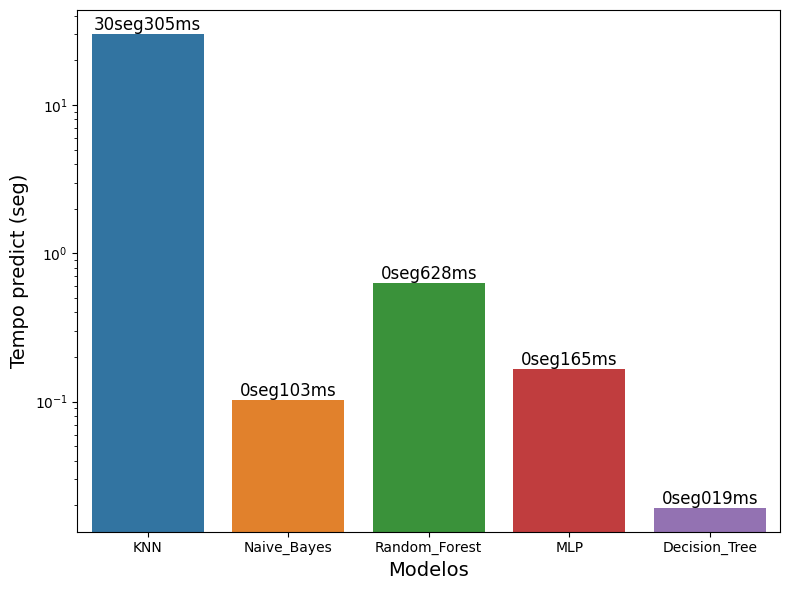

In [110]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=models_info.index, y=models_info['pred_time'])

for index, value in enumerate(models_info['pred_time']):
    seconds, milliseconds = divmod(value, 1)
    milliseconds = int(milliseconds * 1000)
    time_formatted = "{:.0f}seg{:03d}ms".format(seconds, milliseconds)
    plt.text(index, value, time_formatted, ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Modelos', fontsize=14)
ax.set_ylabel('Tempo predict (seg)', fontsize=14)
plt.yscale('log')
plt.tight_layout()
plt.show()

## Hiperpaâmetros de Cada Modelo treinado

In [92]:
print('Random Forest')
rf_grid.cv_results_['params']

Random Forest


[{'max_depth': 2, 'n_estimators': 50},
 {'max_depth': 2, 'n_estimators': 100},
 {'max_depth': 2, 'n_estimators': 200},
 {'max_depth': 3, 'n_estimators': 50},
 {'max_depth': 3, 'n_estimators': 100},
 {'max_depth': 3, 'n_estimators': 200},
 {'max_depth': 4, 'n_estimators': 50},
 {'max_depth': 4, 'n_estimators': 100},
 {'max_depth': 4, 'n_estimators': 200},
 {'max_depth': 5, 'n_estimators': 50},
 {'max_depth': 5, 'n_estimators': 100},
 {'max_depth': 5, 'n_estimators': 200}]

In [94]:
print('KNN')
knn_grid.cv_results_['params']

KNN


[{'n_neighbors': 3},
 {'n_neighbors': 5},
 {'n_neighbors': 7},
 {'n_neighbors': 10},
 {'n_neighbors': 12},
 {'n_neighbors': 15},
 {'n_neighbors': 17}]

In [93]:
print('Decision Tree')
dt_grid.cv_results_['params']

Decision Tree


[{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'},
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'},
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'},
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'},
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'},
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'},
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'},
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'},
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'},
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'},
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'},
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'},
 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto'},
 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt'},
 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2'},
 {'criterion': 'entropy', 'm

In [95]:
print('Naive Bayes')
nb_grid.cv_results_['params']

Naive Bayes


[{}]

In [96]:
print('Multilayer Perceptron')
mlp_grid.cv_results_['params']

Multilayer Perceptron


[{'max_iter': 50},
 {'max_iter': 100},
 {'max_iter': 150},
 {'max_iter': 200},
 {'max_iter': 300},
 {'max_iter': 400},
 {'max_iter': 500}]

## Conclusão

Podemos concluir que o Naive Bayes é o melhor algoritmo para essa base de dados, ele não teve a melhor Curva ROC, mas se fizermos o balanço entre tempo de execução e qualidade ele se sai melhor.

A Random Forest teve uma curva ROC de 0.916114, enquanto o Naive Bayes obteve 0.9019, mas a Random Forest levou cerca de 15min para executar, enquanto o Naive Bayes levou 1 seg. Esse tempo de execução com um resultado tão bom incrível considerando a quantidade expressiva de dados analizados (mais de 240mil linhas).

Apesar do bom resultado da Random Forest, seu tempo de execução foi muito lento. Se o custo computacional não for um parâmetro, podemos considerá-la a melhor opção. Mas como esse não é o caso na maioria das vezes, o Naive Bayes é preferível, seu resultado foi tão bom devido a pouquissimo correlação entre os dados observada na tabela de correlação mostrada no início.